<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>Física estadística </h1>
 <h2>Tarea 1</h2>
 </div>

Aquino Chapa Martha Abril

In [1]:
using Plots
using LaTeXStrings
using DelimitedFiles
using ExcelFiles
using XLSX
using DataFrames
using StatsBase

#### Ejercicio 1:

Genera una gráfica de la frecuencia de soles f(1) contra el número de volados $n$ que haz lanzado
hasta ese momento. Usa los datos obtenidos de:

a) 100 volados (Kerrich hizo 10,000 volados, 100 no son tantos).

b) 1000 volados utilizando un generador aleatorio (a computadora).

c) 10,000 volados utilizando un generador aleatorio (a computadora).

**Solución:**

a) Lanzando 100 veces una moneda, el número de soles obtenidos fuerón 61.

Para generar de manera aleatoria una tirada de una moneda generamos la siguiente función que genera un número aleatorio 1 o 0, y se anexa un contador que cuente el número de soles en una tirada de n volados.

In [39]:
#Creamos una función que nos cuente el número de soles que hay en n tiradas aleatorias.
function num_soles(n)
    sol=0
    for i in 1:n
       sol+=rand((1,0))
    end
    return sol
end     

num_soles (generic function with 1 method)

Realizamos la gráfica de frecuencia

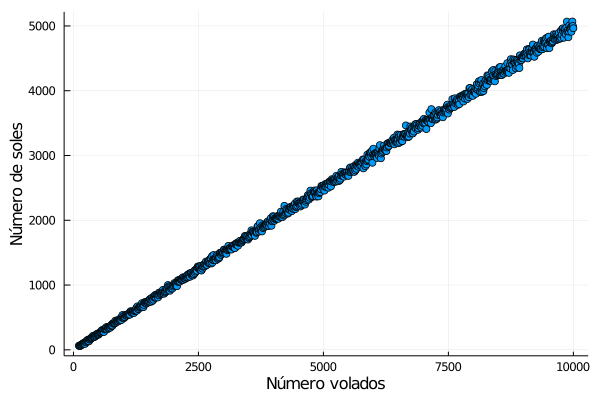

In [48]:
#Definimos el conjunto donde evaluaremos la función num_soles
volados=collect(100:10:10000)
#Creamos un arreglo vacío donde de anexarán el número de soles correspondiente a n volados
soles=[]
#Realizamos un ciclo donde se evalue la función num_soles en el i-ésimo elemento de los volados
for i in volados
    soles=push!(soles,num_soles(i))
end
#Graficamos el número de soles en función del número de tiradas, omitiendo el primer valor que corresponde 100 tiradas
scatter(volados[2:end],soles[2:end],xlabel="Número volados",ylabel="Número de soles")
#Graficamos el resultado obtenido en el inciso a
scatter!(100,61)
plot!(legend=false)

In [62]:
print("Con $(volados[91]) tiradas se obtuvo $(soles[91]) soles.")

Con 1000 tiradas se obtuvo 519 soles.

In [65]:
print("Con $(volados[end]) tiradas se obtuvo $(soles[end]) soles.")

Con 10000 tiradas se obtuvo 4965 soles.

#### Ejercicio 4: Más de caminantes aleatorios... más alcohol
Para el sistema planteado en el inciso 3a), elabora 1000 listas (1000 caminantes) de 30 pasos cada
una. Utiliza para ello un código en tu lenguaje favorito (incluye a tu tarea como apéndice el código,
todo en un mismo pdf). Cada una de estas listas está conformada por instancias o realizaciones de
las siguientes variables aleatorias $X_i$:

$\{X_1, X_2,X_3, ...,X_{29}, X_{30}\}$
Nota: Para generar estas listas en Python, puedes utilizar la función “random.choices”. Por ejemplo,
la siguiente función regresa un arreglo con 30 realizaciones de números al azar de entre {−1, 0, 1},
donde las probabilidades son 1/3 para cada una de ellas:
random.chices ([ −1 , 0 , 1] , w eig h t s = (1/3 ,1/3 ,1/3 ) , k=30).

Cada uno de estos elementos es la magnitud de un paso, es decir, cada uno de los elementos $X_i$ de
la ec (2). Para obtener la trayectoria de la caminata lo  ́unico que tienes que hacer es ir sumando
sucesivamente cada uno de estos elementos (la posición final de la caminata es, entonces, la suma
total de todos esos resultados).

Nota que cada una de estas 1000 caminatas podemos entenderla como una realización de la variable
aleatoria $Y_i$ como la definimos en la ec. (1). De esta manera, esperamos que si tomáramos un número
infinito de realizaciones (es decir, caminatas), recobraríamos la estadística que obtuviste en el inciso
3a). Pero, ¿qué pasaría si el número de realizaciones es finito? Veamos:

a) Gráfica 20 de las (1000) listas junto con la desviación estándar de la expresión analítica que
encontraste para este sistema en el inciso 3a).

In [14]:
#Definimos una función que nos simule una caminata de n pasos
function caminata(n)
    #Definimos los valores de la caminata
    valores = [1,-1,0]
    #Definimos la probabilidad de cada valor
    probabilidad = [1/3,1/3,1/3]
    pasos=[]
    for i in 1:n
        paso=sample(valores, Weights(probabilidad))
        push!(pasos,paso)
    end
    return pasos
end

caminata (generic function with 1 method)

Aplicamos esta función caminata 10000 veces.

In [45]:
#Generamos una matriz donde la i-ésima columna corresponde a la i-ésima caminata
caminatas=zeros(30,1000)
#Generamos un ciclo para llenar las entradas de la matriz
for i in 1:1000
    for j in 1:30
    caminatas[j,i]=caminata(30)[j]
    end
end

Definimos ahora una función que nos de la posición.

In [42]:
function posicion(listas,f,c)
    posicion=zeros(f,c)
    for i in 1:c
    posicion[1,i]=listas[1,i]
        for j in 2:f
            posicion[j,i]=listas[j,i]+posicion[j-1,i]
        end
    end
    return posicion
end

posicion (generic function with 2 methods)

In [55]:
posiciones=posicion(caminatas,30,1000);

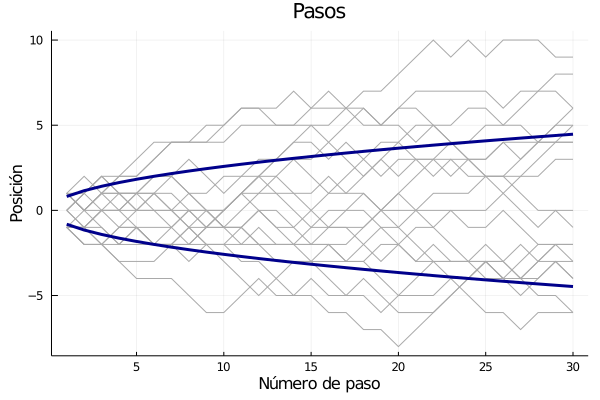

In [47]:
n=collect(1:1:30)
des_estandar=(2*n/3).^(1/2)
plot(title="Pasos",xlabel="Número de paso",ylabel="Posición")#,series_color=(0,0,0))
for j in 1:20
    plot!(posiciones[:,j],label=false,color = :darkgrey)
end
plot!(n,des_estandar,lw = 3,label=false,color = :bluesreds)
plot!(n,-des_estandar,lw = 3,label=false,color=:bluesreds)
plot!()

Ahora, considerando los siguientes grupos de listas, calcula el promedio de la posición como
función del número de pasos y grafícalo.

* i Grupo 1: Incluye 5 caminatas.
* ii Grupo 2: Incluye 100 caminatas.
* iii Grupo 3: Incluye 500 caminatas.
* iv  Grupo 4: Incluye 1000 caminatas. 

Nota: Por ejemplo, para obtener el promedio de la posición dado el primer paso i = 1, del Grupo 1, necesitas sumar el primer elemento de cada una de las cinco primeras caminatas. Para obtener el promedio de la posición dados los primeros dos pasos del Grupo 1, necesitas sumar los segundos elementos de cada una de las cinco primeras caminatas; y así sucesivamente (como ejemplo, puedes ver la Tabla 1).

In [57]:
function promedio(posicion,n)
    promedio=zeros(30)
    for i in 1:30
        for j in 1:n
            promedio[i]+=posicion[i,j]
        end
    end
    return promedio*(1/n)
end

promedio (generic function with 3 methods)

In [59]:
promedios=promedio(posiciones[:,1:5],5);

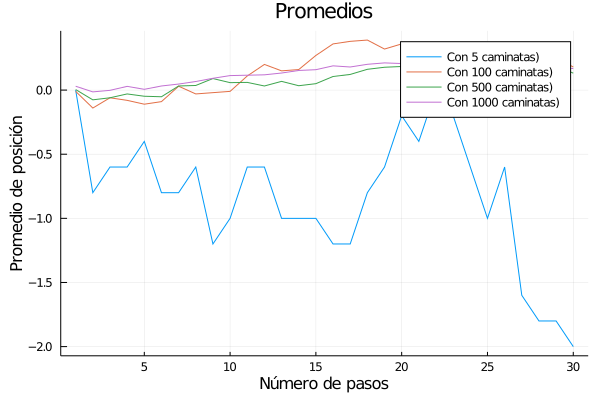

In [62]:
#promedio_total=[]
caminantes=(5,100,500,1000)
#for i in caminantes
 #   push!(promedio_total,promedio(posiciones[:,1:i],i))
#end    
plot(title="Promedios",xlabel="Número de pasos",ylabel="Promedio de posición")#,series_color=(0,0,0))
for j in caminantes
    plot!(promedio(posiciones[:,1:j],j),label="Con $(j) caminatas)")#,color = :darkgrey)
end
plot!()